<a href="https://colab.research.google.com/github/BautiSobenko/IA-2022/blob/main/FCM_Implementacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Generar random dataset
def rand_df( shape ):
  df = np.random.random( shape )
  plt.scatter(df[:,0],df[:,1]); #Grafico de datos en plano bidimensional
  return df

In [ ]:
#Distancia euclidea entre dos puntos
def dist_euclidea(x1, x2):
    return np.linalg.norm(x1-x2)

In [ ]:
def m_pertenencia( k, df, q, centros ):
  tam_ds = df.shape[0]

  M = np.zeros( (k, tam_ds) )

  for h in range( k ):
    for i in range( tam_ds ):
      mki = 0
      for j in range( k ):
        mki += (dist_euclidea(df[i,:],centros[h,:]) / dist_euclidea(df[i,:],centros[j,:])) ** (2/(q-1))
      M[h,i] = 1/mki

  return M

In [ ]:
def act_centros( k, df, M, q):
  tam_ds = df.shape[0]
  centros_act = np.zeros((k,2))

  for j in range( k ):
    num = np.zeros( (1,2) )
    den = 0
    for i in range(tam_ds):
      num += (M[j,i]**q) * df[i,:]
      den += M[j,i]**q
    centros_act[j,:] = np.divide(num,den)

  return centros_act

In [ ]:
def FCM(k, df, q, B):

  centros = np.random.random( (k,2) )

  M = m_pertenencia(k, df, q, centros)

  dato_cluster = np.argmax(M,axis=0)

  colors = np.array( ["blue", "green", "hotpink","yellow"] )
  plt.scatter(df[:,0], df[:,1], c=colors[ dato_cluster ] );
  plt.scatter(centros[:,0], centros[:,1], c="red");
  plt.show()
  
  centros_act = act_centros(k, df, M, q)

  while( dist_euclidea(centros_act, centros) > B ):

    centros = centros_act

    M = m_pertenencia(k, df, q, centros)
    
    dato_cluster = np.argmax(M,axis=0)

    colors = np.array( ["blue", "green", "hotpink","yellow"] )
    plt.scatter(df[:,0], df[:,1], c=colors[ dato_cluster ] );
    plt.scatter(centros[:,0], centros[:,1],c="red");
    plt.show()
    
    
    centros_act = act_centros(k, df, M, q)

    M = m_pertenencia(k, df, q, centros_act)
  
  co = np.arange(M.shape[1])
  fig, ax = plt.subplots(figsize=(14, 7))

  bottom = 0
  for i in range(k):
    ax.bar(co, M[i,:],0.4,bottom, label = "Cluster"+str(i))
    bottom += M[i,:]
  plt.legend(loc='best', bbox_to_anchor=(0.9,-0.2), ncol=3)
  ax.set_title("Pertenencia a Cluster")
  ax.set_xlabel("Clusters")
  ax.set_ylabel("Grado de pertenencia")
  ax.set_xticks(co)


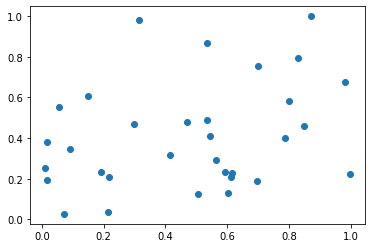

In [ ]:
# Genero dataframe con un determinado shape
df = rand_df( (32, 2) )

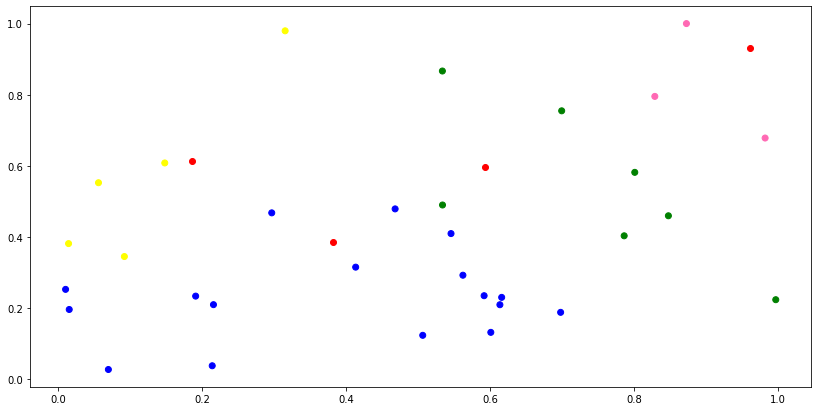

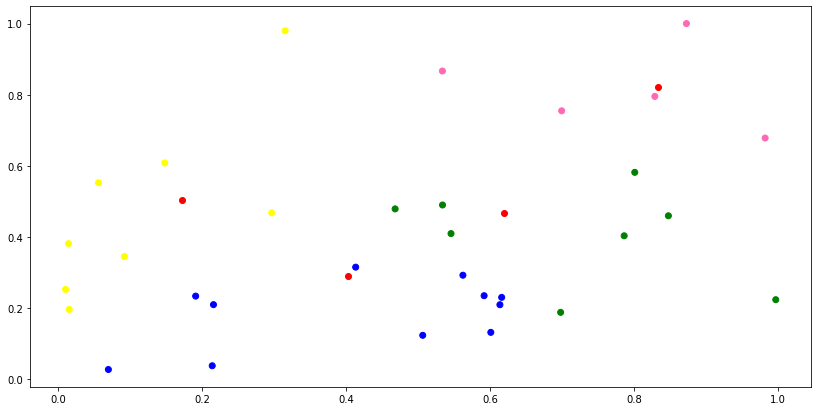

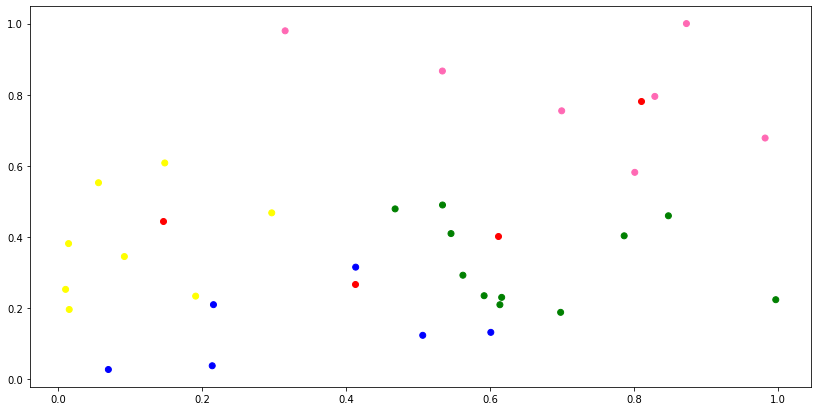

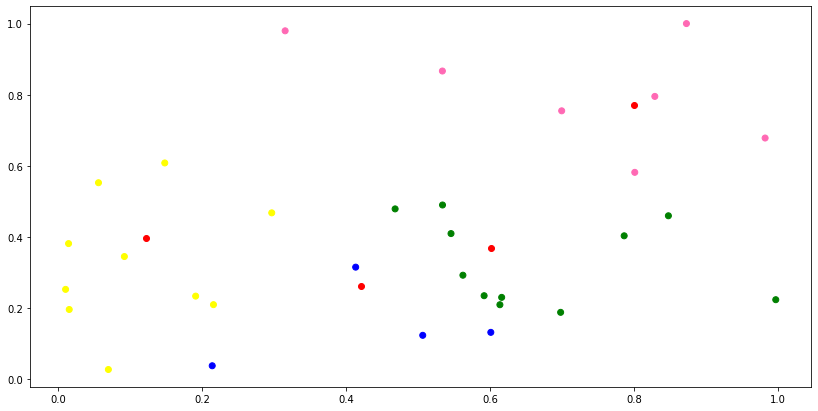

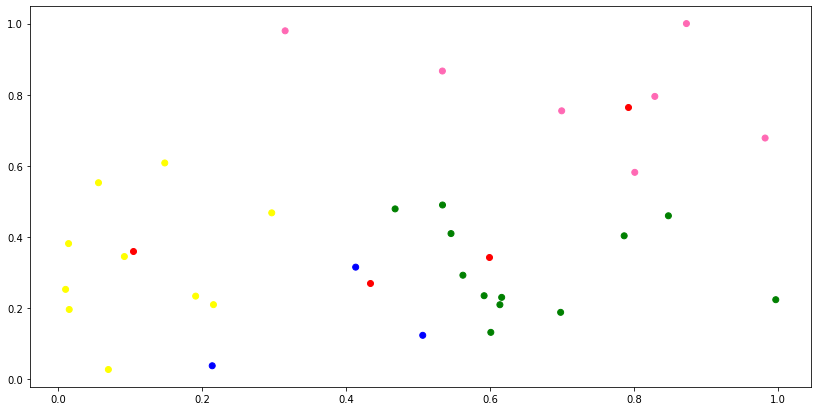

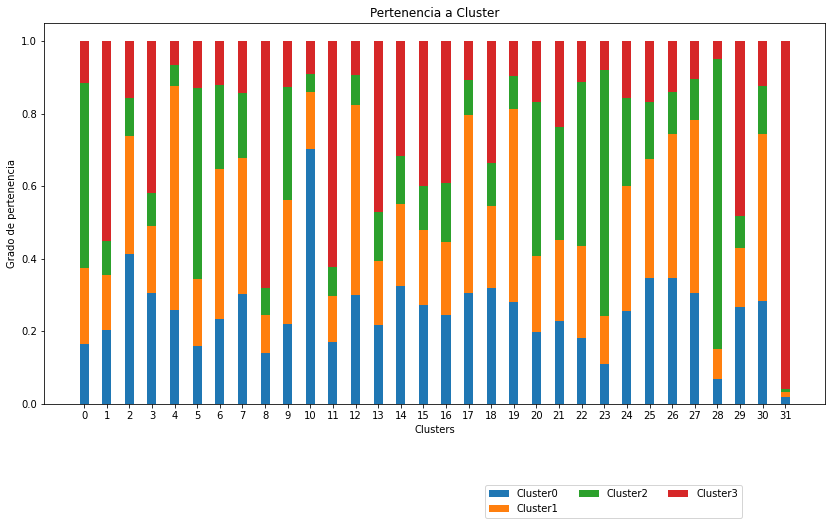

In [ ]:
# k  = Numero de clusters k >= 2
# df = dataframe a utilizar 
# q  = Hiperparametro de Fuzzificacion [1.5, 3.5]
# B  = Criterio de iteracion [0,1]
# FCM(k, df, q, B)
FCM(4, df, 3.0 , 0.05)